In [68]:
import numpy as np
import torch
import scipy as sp

In [69]:
import scipy
scipy.__version__

'1.9.1'

In [263]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import log_expit, expit

def gauss_int(ff, mu=0, sig=1, steps=1000):
    x=np.linspace(-5*sig+mu, 5*sig+mu, steps)
    y = ff(x)
    return np.trapz(y, x=x)

def fit(true_func, fit_func, params_true, mu=0, sig=1, steps=1000, ifplot=True, h=1, log_integral=False):
    x=np.linspace(-h, h, steps)
    y=[]
    for b in x:
        if log_integral:
            y.append(np.log(gauss_int(true_func(b, *params_true), mu=mu, sig=sig, steps=steps)))
        else:
            y.append(gauss_int(true_func(b, *params_true), mu=mu, sig=sig, steps=steps))
    popt, pcov = curve_fit(fit_func, x, y, maxfev = 1000000)
    diff = np.abs(fit_func(x, *popt)- y)
    diff_rel = np.abs((fit_func(x, *popt)- y)/fit_func(x, *popt))
    if ifplot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
        ax1.plot(x, y, 'b.',
                label=f'real')
        ax1.plot(x, fit_func(x, *popt), 'r-',
                label=f'fit')
        ax2.plot(x, diff,
                label='absolute difference')
        ax3.plot(x, diff_rel,
                label='relative difference')
        ax1.legend()
        for pp in popt:
            print(f"param {pp:.2}")
    return popt, max(diff), max(diff_rel), x, y

def plot_curve(true_func, params_true, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(int_f(true_func(b, *params_true)))
    ax1.plot(x, y, 'b.',
            label=f'real')
def plot_fit(fit_funct, params, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(fit_funct(b, *params))
    ax1.plot(x, y, 'b.',
            label=f'fit_func')




In [264]:
def RS(h, q=1):
    def ff(x): 
        return np.exp(-((x)**2)/q) * log_expit(x+h)
    return ff

def RS_ff(h, a0=1, a1=1, b0=1, b1=1):
        return a0+b0*log_expit(a1+b1*h)
def RS_ff_small(h, b0=1, b1=1):
        return b0*log_expit(b1*h)

q=0.01
params = []
lll = np.linspace(0.0001,0.999,20)
for qq in lll:
    aa=fit(RS, RS_ff_small, [qq], mu=0, sig=1, ifplot=False)
    params.append(aa[0])

In [265]:
params

[array([0.01772283, 0.99999104]),
 array([0.40868146, 0.99532879]),
 array([0.58033982, 0.99073772]),
 array([0.7138841 , 0.98621587]),
 array([0.82796396, 0.98176134]),
 array([0.9297694 , 0.97737232]),
 array([1.02296948, 0.97304706]),
 array([1.10973253, 0.9687839 ]),
 array([1.1914639 , 0.96458123]),
 array([1.26913453, 0.9604375 ]),
 array([1.34344748, 0.95635124]),
 array([1.41493061, 0.95232101]),
 array([1.4839917 , 0.94834545]),
 array([1.55095325, 0.94442323]),
 array([1.61607523, 0.94055308]),
 array([1.67957069, 0.93673376]),
 array([1.74161664, 0.93296409]),
 array([1.80236198, 0.92924293]),
 array([1.86193323, 0.92556918]),
 array([1.92043892, 0.92194175])]

0
1


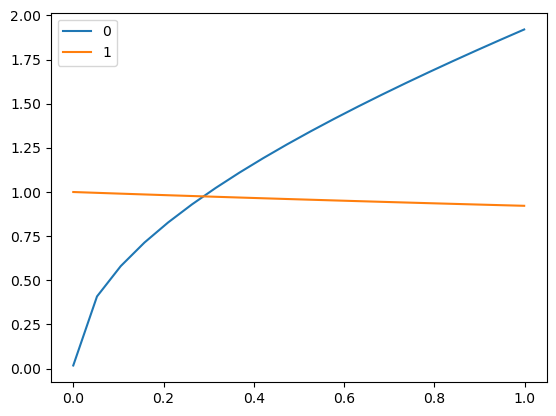

In [266]:
params = np.array(params)
for xx in range(params.shape[1]):
    print(xx)
    plt.plot(lll, params[:,xx], label=f"{xx}")
plt.legend()

param 0.089
param -0.0025
param 0.038
param 0.021
param 0.99


(array([ 0.08895562, -0.0024698 ,  0.03785653,  0.02064346,  0.99315848]),
 3.564058320693064e-08,
 2.0322338525818402e-07,
 array([-1.        , -0.997998  , -0.995996  , -0.99399399, -0.99199199,
        -0.98998999, -0.98798799, -0.98598599, -0.98398398, -0.98198198,
        -0.97997998, -0.97797798, -0.97597598, -0.97397397, -0.97197197,
        -0.96996997, -0.96796797, -0.96596597, -0.96396396, -0.96196196,
        -0.95995996, -0.95795796, -0.95595596, -0.95395395, -0.95195195,
        -0.94994995, -0.94794795, -0.94594595, -0.94394394, -0.94194194,
        -0.93993994, -0.93793794, -0.93593594, -0.93393393, -0.93193193,
        -0.92992993, -0.92792793, -0.92592593, -0.92392392, -0.92192192,
        -0.91991992, -0.91791792, -0.91591592, -0.91391391, -0.91191191,
        -0.90990991, -0.90790791, -0.90590591, -0.9039039 , -0.9019019 ,
        -0.8998999 , -0.8978979 , -0.8958959 , -0.89389389, -0.89189189,
        -0.88988989, -0.88788789, -0.88588589, -0.88388388, -0.88188188,


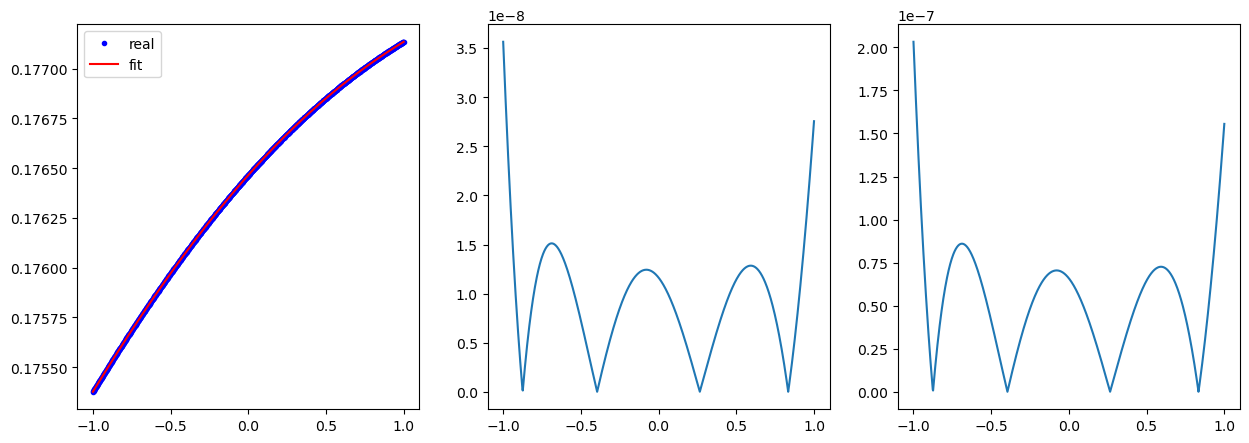

In [267]:
def RSB1(h, q=1, m=1):
    def ff(x): 
        return np.exp(-((x)**2)/q + x + m*log_expit(x+h))
    return ff

def RSB1_ff(h, a0=1, a1=1,a2=1, b1=1, b2=1):
        return a0*(1+ np.exp(a1+b1*log_expit(a2+b2*h)))

q=0.01
m=0.01
fit(RSB1, RSB1_ff, [q,m], mu=q, sig=1)

In [268]:
aa

(array([1.92043892, 0.92194175]),
 0.0031994111763681277,
 0.004975137617078952,
 array([-1.        , -0.997998  , -0.995996  , -0.99399399, -0.99199199,
        -0.98998999, -0.98798799, -0.98598599, -0.98398398, -0.98198198,
        -0.97997998, -0.97797798, -0.97597598, -0.97397397, -0.97197197,
        -0.96996997, -0.96796797, -0.96596597, -0.96396396, -0.96196196,
        -0.95995996, -0.95795796, -0.95595596, -0.95395395, -0.95195195,
        -0.94994995, -0.94794795, -0.94594595, -0.94394394, -0.94194194,
        -0.93993994, -0.93793794, -0.93593594, -0.93393393, -0.93193193,
        -0.92992993, -0.92792793, -0.92592593, -0.92392392, -0.92192192,
        -0.91991992, -0.91791792, -0.91591592, -0.91391391, -0.91191191,
        -0.90990991, -0.90790791, -0.90590591, -0.9039039 , -0.9019019 ,
        -0.8998999 , -0.8978979 , -0.8958959 , -0.89389389, -0.89189189,
        -0.88988989, -0.88788789, -0.88588589, -0.88388388, -0.88188188,
        -0.87987988, -0.87787788, -0.875875

# Numerical of gaussian integral of exp(log(cosh))

param 2.3
param 0.51
param 1.5
param 0.00032


[]

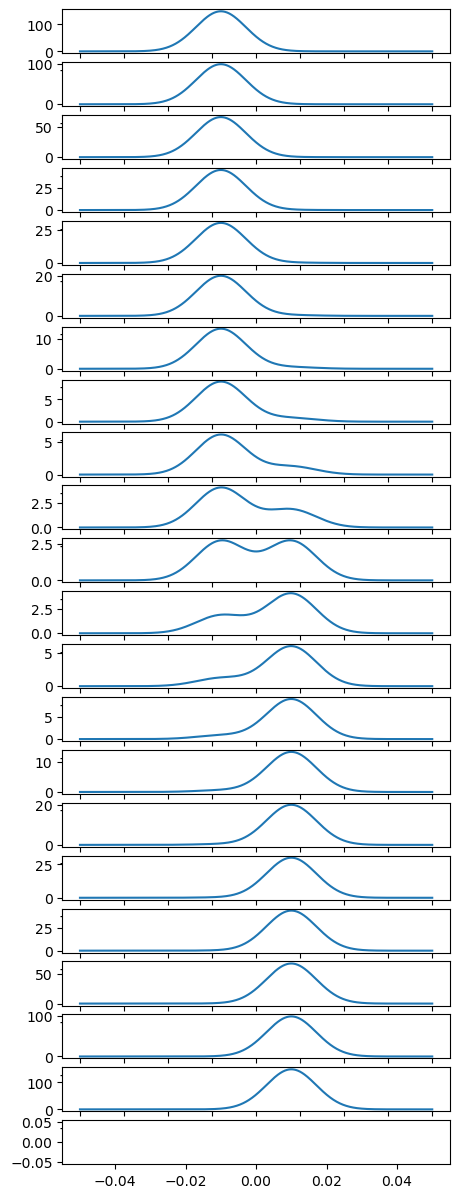

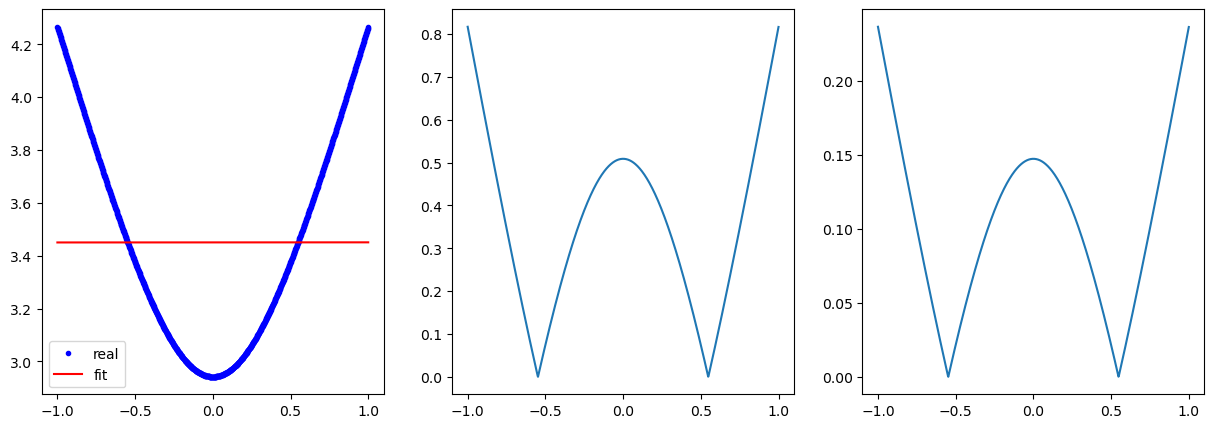

In [269]:

import matplotlib.pyplot as plt
steps_h = 21

fig, axs = plt.subplots(steps_h+1,1, figsize=(5,15))

q=2
mu=0
sig=q
steps=1000
iii=0
area = []
for h in np.linspace(-q,q, steps_h):
    params_true=[1]
    x=np.linspace(-5*sig+mu, 5*sig+mu, steps)
    y=[]
    log_cosh_h = log_cosh(h, k=q)
    for b in x:
        y.append(log_cosh_h(b))
    axs[iii].plot(x,y, label=f"{h}")
    iii+=1
    area.append(np.log(gauss_int(log_cosh_h, sig=q, steps=10000)))

aa=log_fit(log_cosh, log_cosh_fit, [q], mu=0, sig=0.5*q, ifplot=True)

axs[-1].plot()

In [270]:
N=1
def log_cosh(h, k=1, N=N, c=0., d=1):
    def ff(x): 
        return np.exp(N*(-((x)**2)/(2*k) + d*np.log(2*np.cosh(x+k*h+c)))) 
    return ff

def log_cosh_fit(h, a0=1, a1=1, b0=1, b1=1):
    return a0+b0*np.log(2*np.cosh(a1+b1*h))

def log_cosh_fit2(h, a0=1, a1=1, b0=1, b1=1, c0=1, c1=1, a11=1, b11=1):
    return a0+b0*np.log(c0*np.cosh(a1+b1*h)+c1*np.cosh(a11+b11*h))


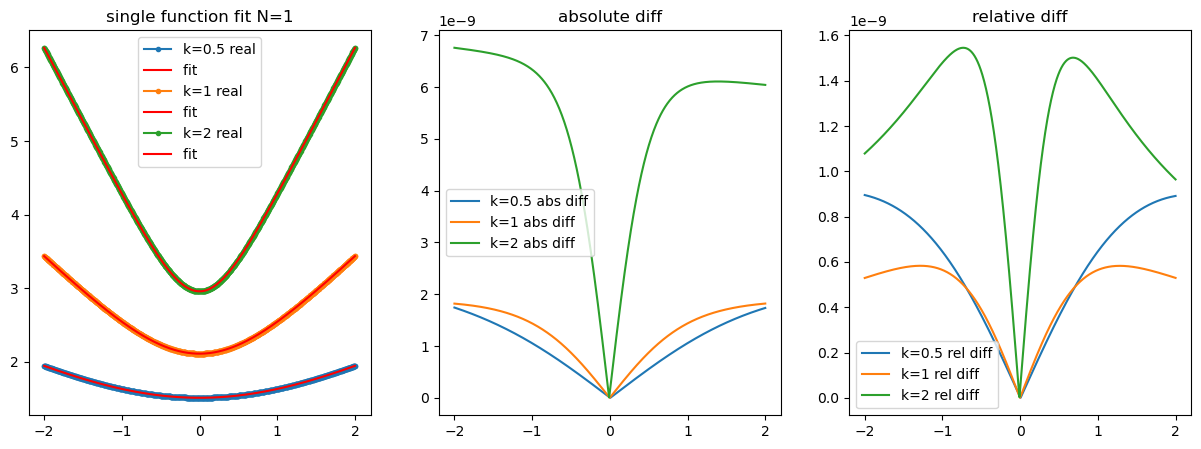

In [271]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fit_funct=log_cosh_fit
for q in [0.5,1,2]:
    popt, max_diff, diff_rel, x, y = log_fit(log_cosh, fit_funct, [q], mu=0, sig=q, ifplot=False, h=2)
    diff = np.abs(fit_funct(x, *popt)- y)
    diff_rel = np.abs((fit_funct(x, *popt)- y)/fit_funct(x, *popt))

    res, = ax1.plot(x, y, marker='.', linestyle=None,
            label=f'k={q} real')
    ax1.plot(x, fit_funct(x, *popt), color="red", linestyle='solid',
            label=f'fit ')
    ax2.plot(x, diff,
            label=f'k={q} abs diff')
    ax3.plot(x, diff_rel,
            label=f'k={q} rel diff')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title(f"single function fit N={N}")
ax2.set_title("absolute diff")
ax3.set_title("relative diff")
plt.savefig(f"./plots/CW_fit_N{N}.pdf")


# Numerical of gaussian integral of log(cosh)

In [272]:
N=1
def log_cosh_no_exp(h, k=1):
    def ff(x): 
        return np.exp( -x**2) * np.log(np.cosh(k*x+h)) 
    return ff

def log_cosh_fit_no_exp(h, a0=1, a1=1, b0=1, b1=1):
    return a0+b0*np.log(np.cosh(a1+b1*h))


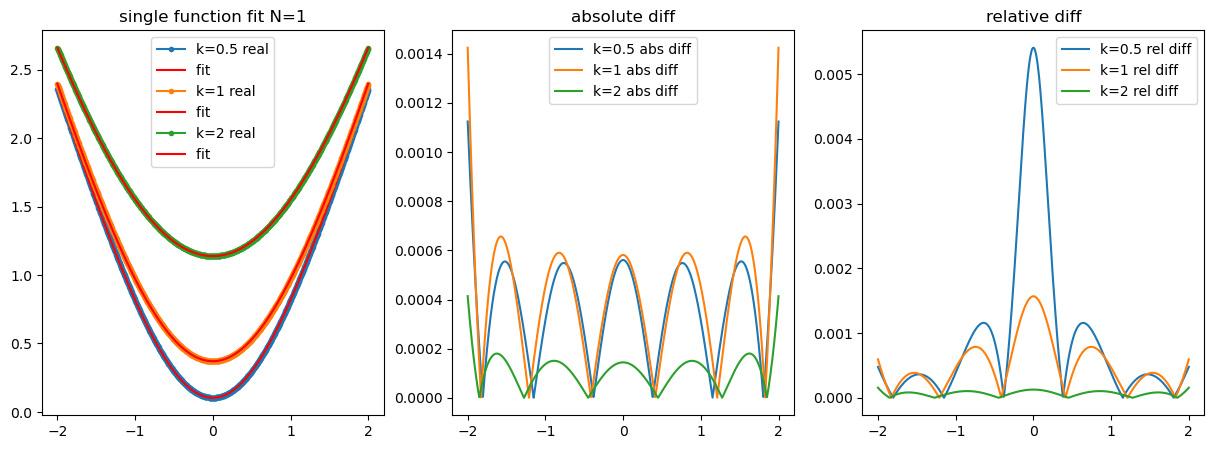

In [273]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fit_funct=log_cosh_fit_no_exp
true_func = log_cosh_no_exp
for q in [0.5,1,2]:
    popt, max_diff, diff_rel, x, y = fit(true_func, fit_funct, [q], mu=0, sig=q, ifplot=False, h=2)
    diff = np.abs(fit_funct(x, *popt)- y)
    diff_rel = np.abs((fit_funct(x, *popt)- y)/fit_funct(x, *popt))

    res, = ax1.plot(x, y, marker='.', linestyle=None,
            label=f'k={q} real')
    ax1.plot(x, fit_funct(x, *popt), color="red", linestyle='solid',
            label=f'fit ')
    ax2.plot(x, diff,
            label=f'k={q} abs diff')
    ax3.plot(x, diff_rel,
            label=f'k={q} rel diff')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title(f"single function fit N={N}")
ax2.set_title("absolute diff")
ax3.set_title("relative diff")
plt.savefig(f"./plots/RFIM_fit.pdf")


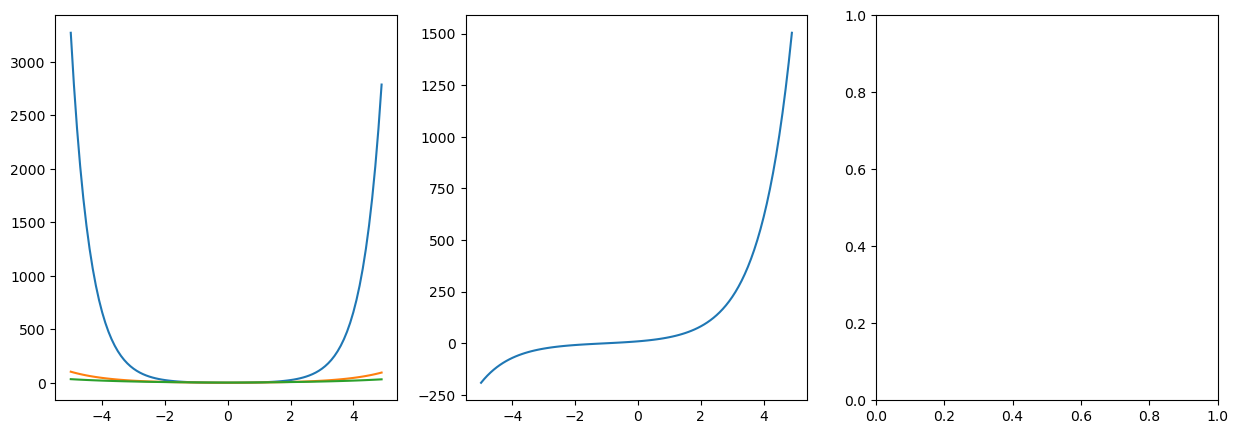

In [90]:
m0=0.4
q0=0.4
m1=0.5
q1=0.5
m2=0.6
q2=0.7
beta=4
def real_0(h, m0=m0, q0=q0, beta=beta):
    def ff(x):
        return np.exp(-((x)**2)/q0) * np.power(np.cosh(beta*(x+h)),m0)
    return int_f(ff)

def real_1(h, m1=m1, q1=q1, m0=m0, q0=q0, beta=beta):
    def ff(x):
        return np.exp(-((x)**2)/q1) * np.power(real_0(x+h,m0=m0, q0=q0, beta=beta) ,m1)
    return int_f(ff)

def real_2(h, m1=m1, q1=q1, m0=m0, q0=q0, beta=beta,  m2=m2, q2=q2):
    def ff(x):
        return np.exp(-((x)**2)/q2) * np.power(real_1(x+h,m1=m1, q1=q1,m0=m0, q0=q0, beta=beta) ,m2)
    return int_f(ff)

def lot_of_cosh(x, a0=1, b0=1, a1=0, b1=0, a2=0, b2=0, c0=0, c1=0, c2=0., d0=0):
    return a0*np.cosh(b0*x+c0) + a1*np.cosh(b1*x+c1) + a2*np.cosh(b2*x+c2) + d0

import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

hs = np.arange(-5, 5, 0.1)
y=[real_0(h) for h in hs]
y1=[real_1(h) for h in hs]
y2=[real_2(h) for h in hs]
y3=[lot_of_cosh(h, b1=-1, a1=-1.1, c0=1, c1=1, a2=1, b2=-1, c2=-3) for h in hs]
ax1.plot(hs, y)
ax1.plot(hs, y1)
ax1.plot(hs, y2)
ax2.plot(hs, y3)


In [143]:

def f_cos(h, q0=1, beta=1):
    def f_(x, b=0.1):
        return np.exp(-((x)**2)/q0) * np.cos(beta*(x+h)) + b
    return f_

def f_cos_mon(h, q0=6, beta=5):
    def f_(x):
        return h + q0 * np.cos(beta*(x+h))
    return f_

def f_rs(h, q0=1, beta=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(beta*(x+h))
    return f_
def f_rs_approx(x, a, b, c,d):
    return a + b * log_expit(c*x+d)
    
def f_1rsb_0(h, q1=1, m1=0.5, m1_=1, beta=1):
    def f_(x):
        return np.exp(-((x)**2)/q1 + m1_*x + m1*log_expit(beta*(x+h)))
    return f_
def f_1rsb_0_approx(x, a, b, c, d, e):
    return a + np.exp(b + c * log_expit(d*x+e))

def f_1rsb_1(h, q0=1, a=1, b=1, c=1, d=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(a + b * log_expit(c*(x+h) + d))
    return f_
def f_1rsb_1_approx(x, a1, b1, a2, b2, a3, b3):
    return a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x))

def f_2rsb_0(h, q0=1, a=1, b=1, c=1, d=1, e=1 ,f=1):
    def f_(x):
        return np.exp(-((x)**2)/q0) * log_expit(f + e*log_expit(a + b * log_expit(c*(x+h) + d)))
    return f_
def f_2rsb_0_approx(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x)))

def f_2rsb_0_approx_serial(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit( a2 * x)) + b2 * log_expit( a3 + b3 * x)

def f_2rsb_1_approx_serial(x, a0, b0, a1, b1,a11, b11, a2,a22, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit( a2 * x)) + b2 * log_expit(a11 + b11 * log_expit( a22 * x))


In [127]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit(true_func, fit_func, params_true, range=5, dx=0.1):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(int_f(true_func(b, *params_true)))
    popt, pcov = curve_fit(fit_func, x, y, maxfev = 1000000)
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, fit_func(x, *popt), 'r-',
            label=f'fit: {popt}')
    ax1.plot(x, y, 'b.',
            label=f'real')
    #ax2.set_ylim(0,2)
    ax2.plot(x, np.abs(fit_func(x, *popt)- y),
            label='diff')
    ax3.plot(x, np.abs(fit_func(x, *popt)- y)/y,
            label='diff')
    ax1.legend()
    for pp in popt:
        print(f"param {pp:.2}")

def plot_curve(true_func, params_true, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(int_f(true_func(b, *params_true)))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'real')
def plot_fit(fit_funct, params, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(fit_funct(b, *params))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'fit_func')




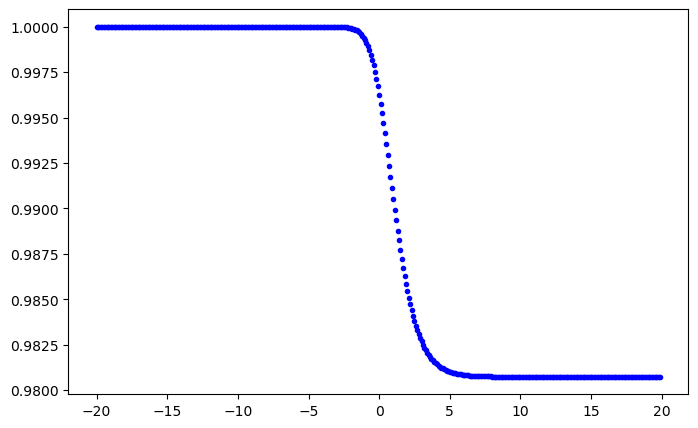

In [128]:
def f_2rsb_0_approx(x, a0, b0, a1, b1, a2, b2, a3, b3):
    return a0 + b0 * log_expit(a1 + b1 * log_expit(a2 + b2 * log_expit( a3 + b3 * x)))

plot_fit(f_2rsb_0_approx,[1, 1, 3, -3, 1, 1, -1, 1], range=20, dx=0.1 )

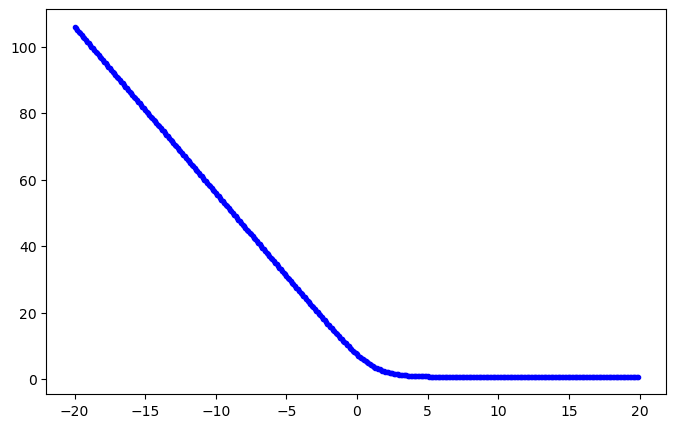

In [129]:

plot_fit(f_2rsb_0_approx_serial,[1, 1, 1, -1, 2, -5, -1, 1], range=20, dx=0.1 )

param 3.1
param 0.044
param 3.1
param 0.044
param 3.1
param 0.044
param 4.6
param 4.6
param 4.6
param -4.6e+02


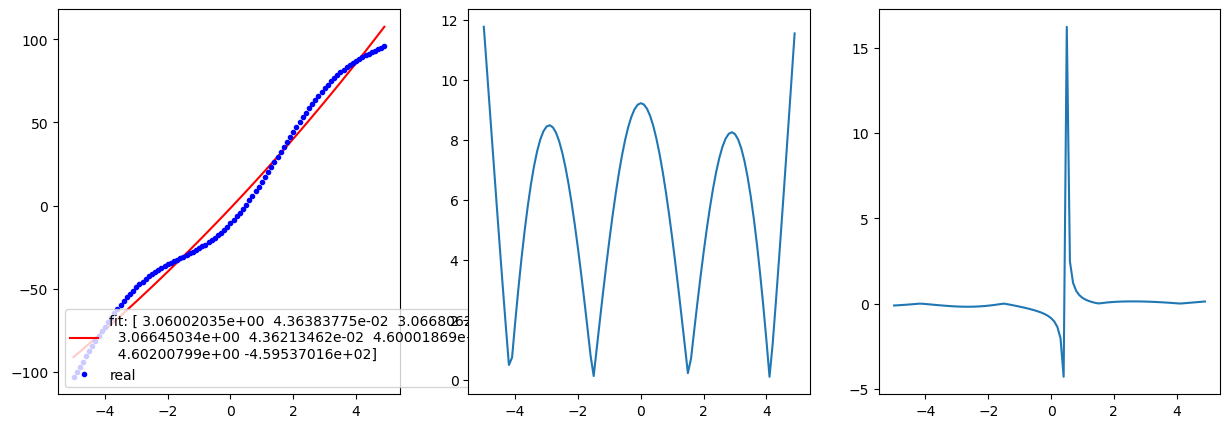

In [135]:
fit(f_cos_mon, lot_of_cosh, [10,1])

param 5.9e+03
param 4.1e+02
param 2.7e+01
param 4.9e+01
param 2.7e+01
param 4.9e+01
param 0.001
param 0.001
param 4.1e+02
param 1.0
param 1.0


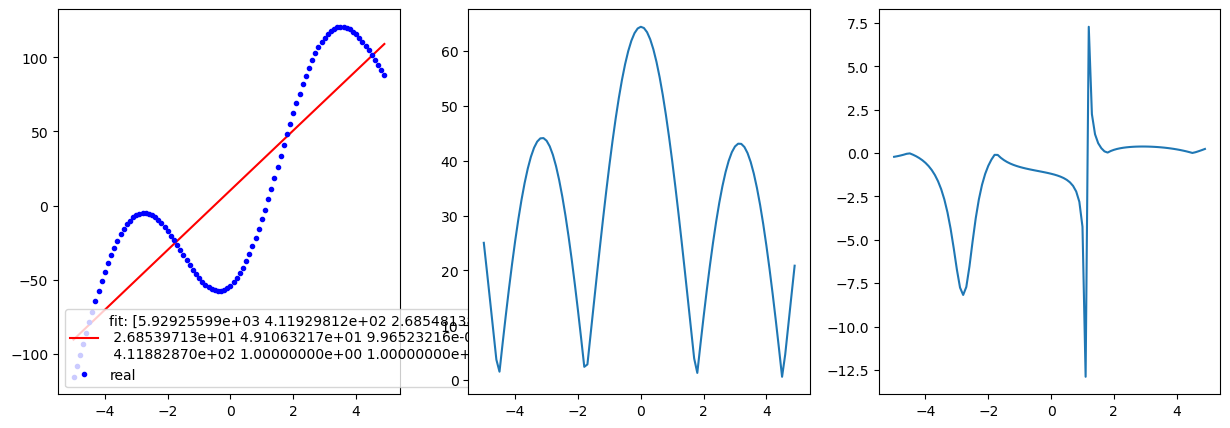

In [147]:
fit(f_cos_mon, f_2rsb_1_approx_serial, [50,1])

param -0.0026
param 0.35
param 1.0
param 1.7
param 0.44


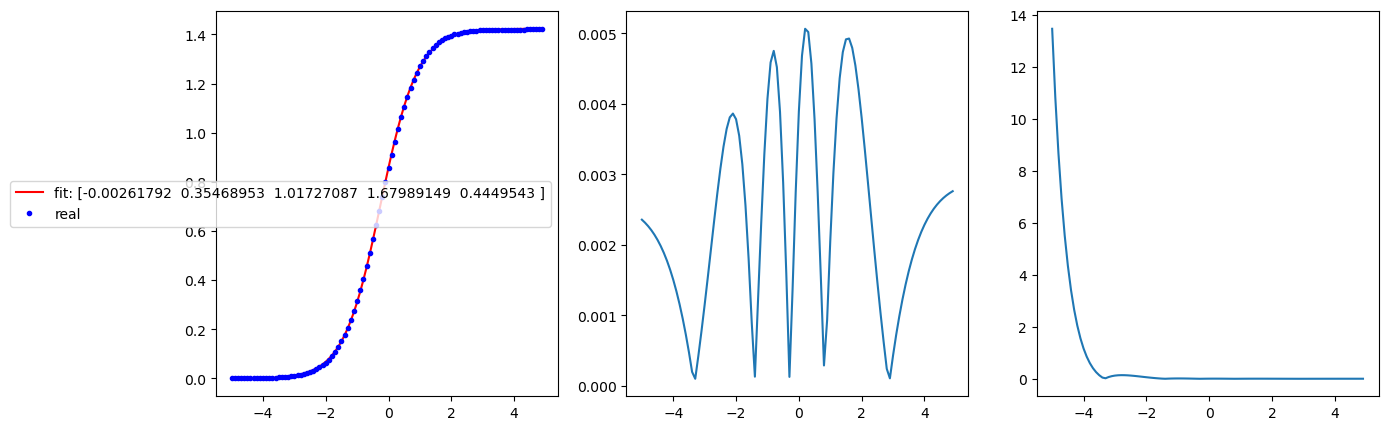

In [ ]:
fit(f_1rsb_0, f_1rsb_0_approx, [0.5,1,1,2])

param -0.0024
param 0.0083
param 4.3e+01
param 5.8
param -3.2e+01
param -7.6


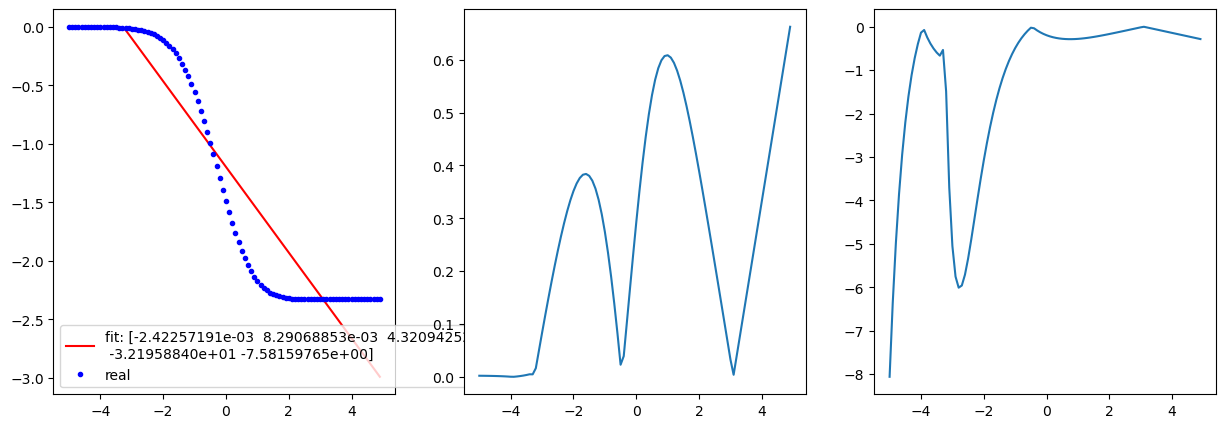

In [ ]:
fit(f_1rsb_1, f_1rsb_1_approx, [1, -1, -0.4, 5.2, -1.2])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 100000.

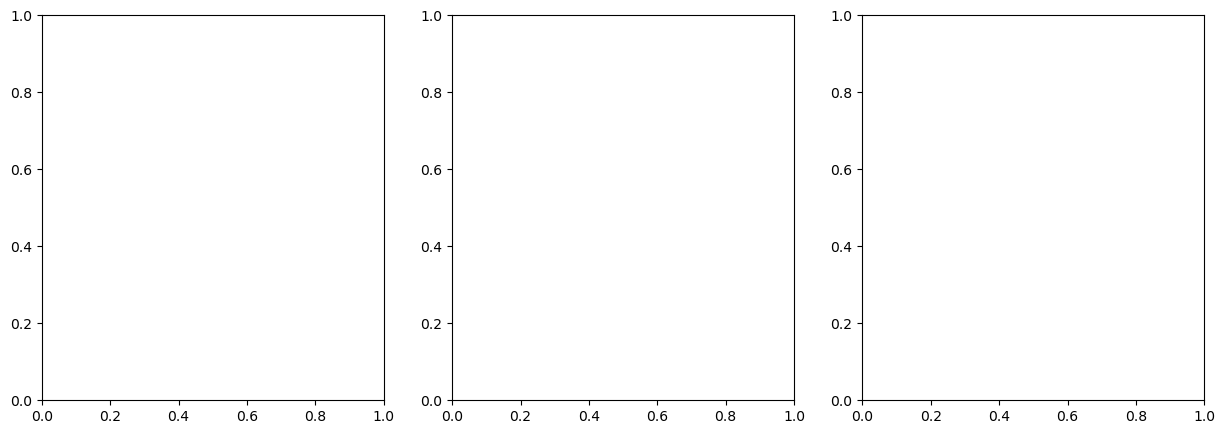

In [70]:
fit(f_2rsb_0, f_2rsb_0_approx, [1, -1, -1.4, -.1, -1, -0.3, -1])

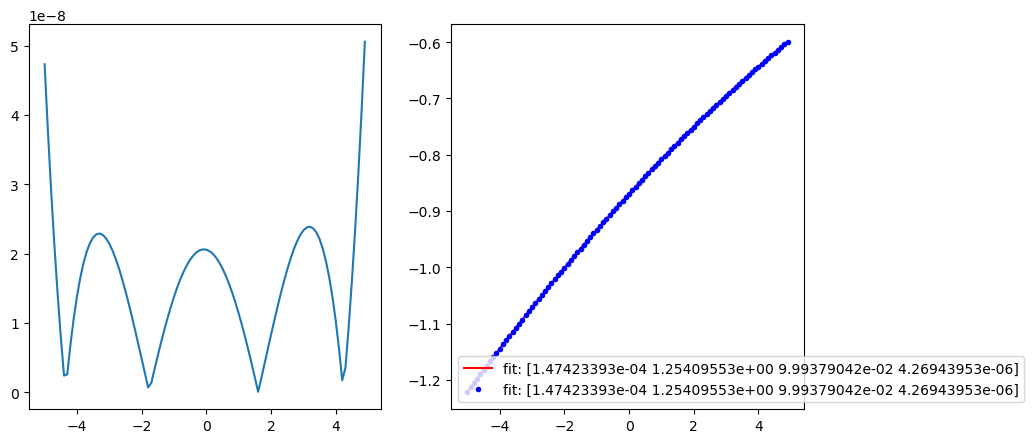

In [27]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

x = np.arange(-5,5,0.1)
true_func = f_rs
fit_func = f_rs_approx
y = []
params_true = [0.5,0.1]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000, ftol=1e-12, xtol=1e-12, gtol=1e-12)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, np.abs(fit_func(x, *popt)- y),
         label='diff')
plt.legend()

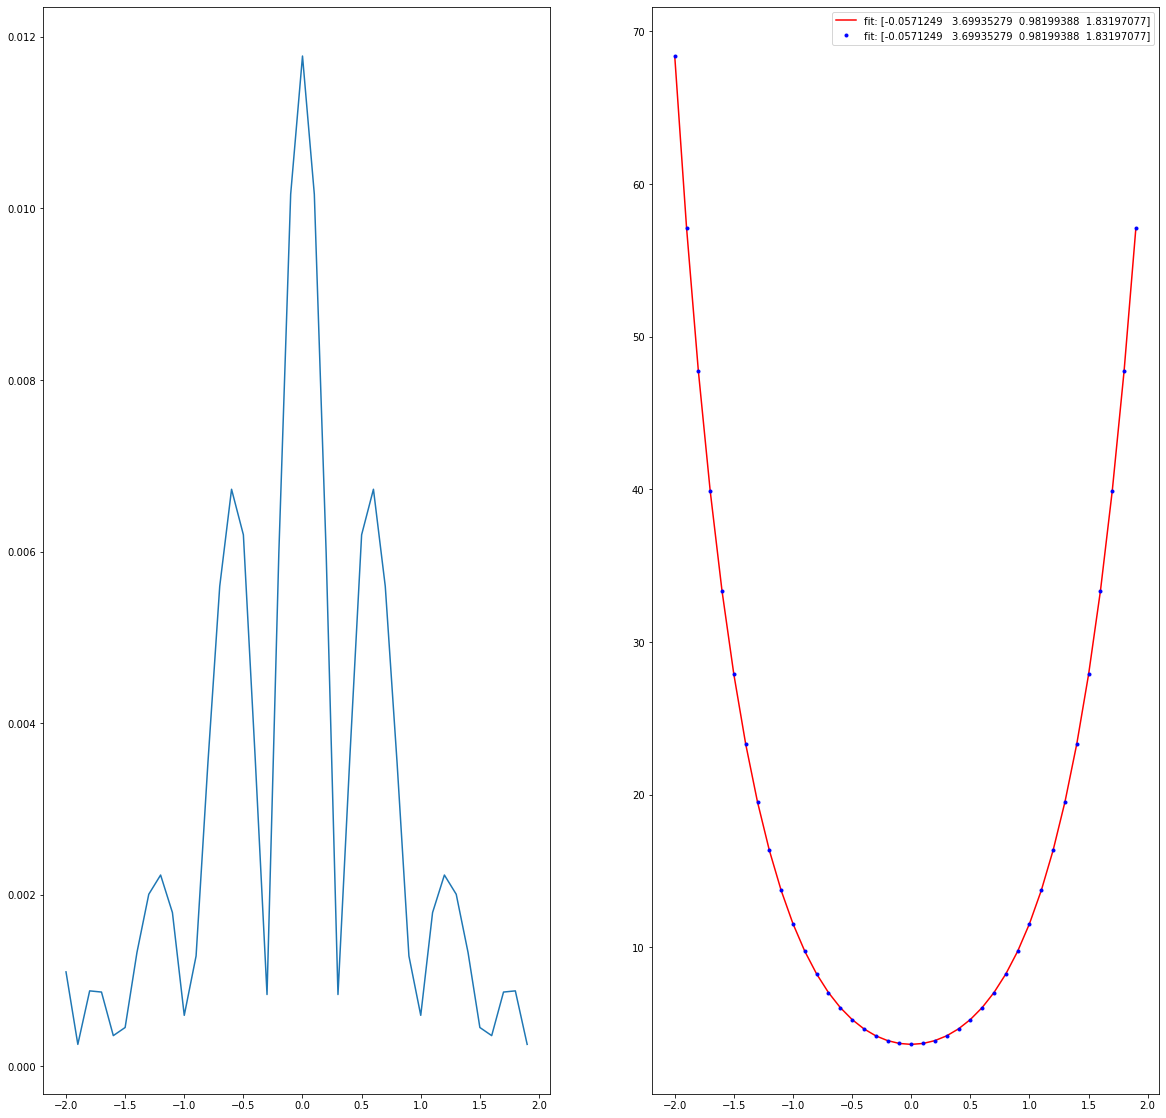

In [162]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

x = np.arange(-2,2,0.1)
true_func = f_1rsb_0
fit_func = f_1rsb_0_approx
y = []
params_true = [0.9,0.9,2]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, 100*np.abs(fit_func(x, *popt)- y)/y,
         label='diff')
plt.legend()

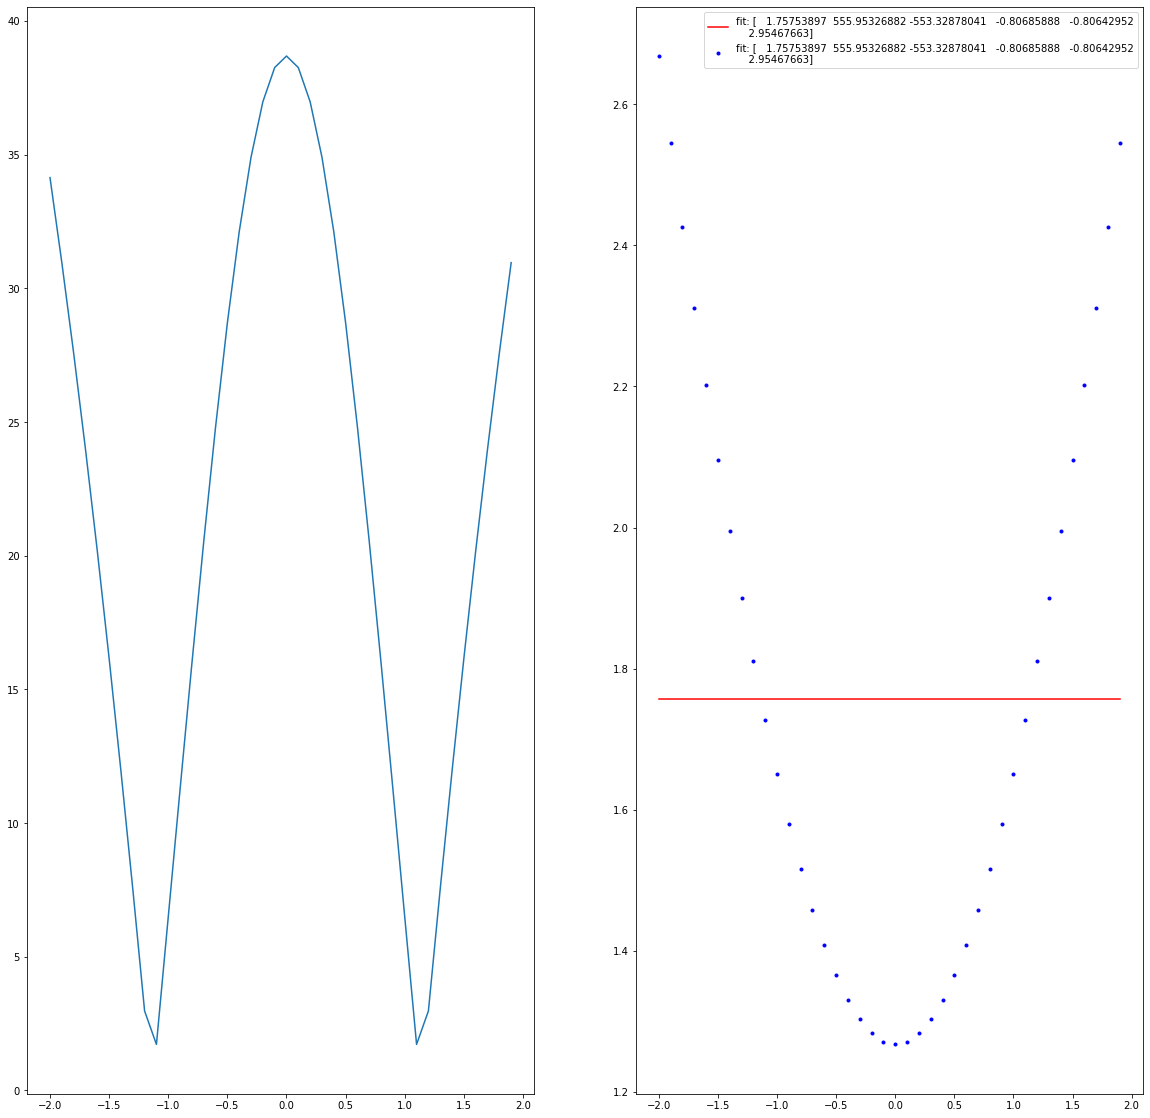

In [164]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

x = np.arange(-2,2,0.1)
true_func = f_1rsb_1
fit_func = f_1rsb_1_approx
y = []
params_true = [0.9,0.9,1,1]
for b in x:
    y.append(int_f(true_func(b, *params_true)))

popt, pcov = curve_fit(fit_func, x, y, maxfev = 100000)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, fit_func(x, *popt), 'r-',
         label=f'fit: {popt}')
ax2.plot(x, y, 'b.',
         label=f'fit: {popt}')
#ax2.set_ylim(0,2)
ax1.plot(x, 100*np.abs(fit_func(x, *popt)- y)/y,
         label='diff')
plt.legend()

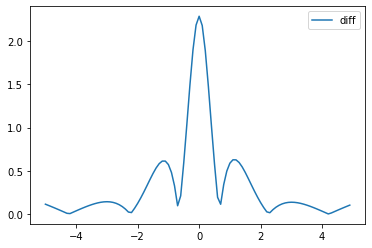

In [123]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * np.log(np.cosh(d*x+c)) + b

x = np.arange(-5,5,0.1)
y = []
h0=0
a=1
for b in x:
    y.append(int_f(f(b, h0, a)))

#plt.plot(x,y)
xx=np.arange(-1,1,0.01)
yy=0.65*xx**2+0.4
#plt.plot(xx,yy)
xxx=np.arange(1,5,0.01)
yyy=1.8*xxx-1
#plt.plot(xxx,yyy)
x2=np.arange(-5,5,0.01)
popt, pcov = curve_fit(func, x, y)
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
#plt.plot(x, func(x, *popt), 'r-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f,' % tuple(popt))
plt.plot(x, 100*np.abs(func(x, *popt)- y)/y,
         label='diff')
plt.legend()

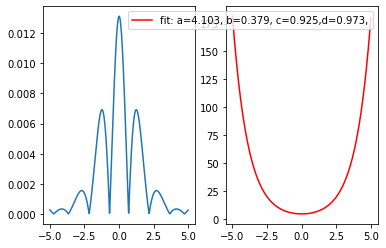

In [99]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig, (ax1, ax2) = plt.subplots(1, 2)

def func_m(x, a, b, c, d):
    return (a * np.cosh(c*x) + b)**d

x = np.arange(-5,5,0.01)
y = []
h0=0
a=2
m=0.9
c=0.2
for b in x:
    y.append(int_f(f_m(b, h0=h0, a=a, m=m, c=c), dx=0.01))

#plt.plot(x,y)
popt, pcov = curve_fit(func_m, x, y, maxfev = 100000, p0=[1,0.1,1,m])
#plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
ax2.plot(x, func_m(x, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f,d=%5.3f,' % tuple(popt))
ax1.plot(x, 100*np.abs(func_m(x, *popt)- y)/y,
         label='diff')
plt.legend()

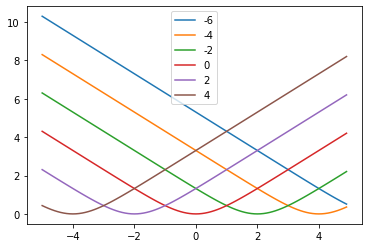

In [66]:
bb = np.arange(-6,6,2)
y = []
for b in bb:
    x = np.arange(-5,5,0.1)
    y = f1(b,x)
    plt.plot(x,y, label=f"{b}")
plt.legend()
